In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/players_20.csv',na_filter=['+#'])
pd.set_option('display.max_columns',None)
#data.head()

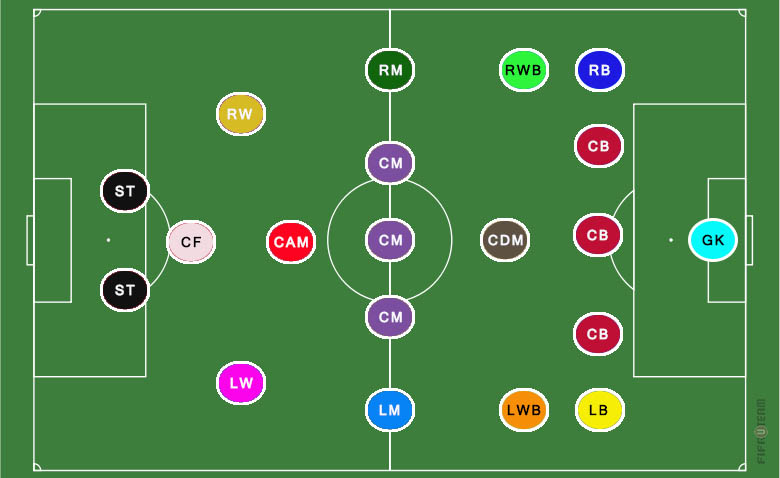

**bold text**

BASIC **CHECK**

In [ ]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [ ]:
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [ ]:
columns = list(data.columns)
print(columns,end=" ")

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [ ]:
data.shape

(18278, 104)

In Given data there are 18278 observations and 104 features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


STASTICAL MEASURE OF DATA

In [ ]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

no constant column on the data

In [ ]:
data.describe(include='O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,loaned_from,joined,nation_position,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,1499,18038,1048,16990,1126,7566,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,2,83,29,316,1760,26,921,94,94,94,107,103,103,103,107,103,103,103,100,88,88,88,100,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,No,#Strength,SUB,Sassuolo,2019-07-01,SUB,Early Crosser,61+2,61+2,61+2,63+2,63+2,63+2,63+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,16310,514,7820,17,1465,587,501,725,725,725,736,727,727,727,736,748,748,748,809,775,775,775,809,682,636,636,636,682,667,621,621,621,667


no constant column on the data

In [ ]:
# First remove the special character from data
data = data.replace('[\#]','',regex=True)
data.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"Dribbler, Distance Shooter, Crosser, FK Specia...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


In [ ]:
# Split the column and remove the '+' with the values after them
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
           'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
data[columns]

for colmun in columns: # for itertion of columns
    data[colmun] = data[colmun].str.split('+',expand=True)[0] # Split of string
data.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"Dribbler, Distance Shooter, Crosser, FK Specia...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63


In [ ]:
univariate = data[[ 'age',  'height_cm', 'weight_kg','overall', 'potential', 'value_eur', 'wage_eur',
                   'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type',
                   'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number',
                   'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing',
                   'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
                   'gk_positioning','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                   'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
                   'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
                   'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
                   'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
                   'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking',
                   'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
                   'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf',
                   'cf', 'rf', 'rw', 'lam','cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
                   'lb', 'lcb', 'cb', 'rcb', 'rb']]
import sweetviz
sv = sweetviz.analyze(univariate)
sv.show_html() #Generate default argument

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


OBSERVATIONS:
1.AGE:
The range of player age between 16 to 42 with the average of 25.3
2.HEIGHT CM:
The average height of pplayer is 181.4cm, maximum height is 205 and minimum height is 156cm.
3.WEIGHT KG:
The range of weight of player between 50 to 110kg.
4.OVERALL:
The maximum score of stats is 94 and minimum is 48.0 with the average of 66.2
5.POTENTIAL:
The maximum score of player potential is 95.0 and minimum score of potential is 49.0
6.VALUE EUR:
The average value of player is 2.5million.
Maximum value of player is 105.5 million.
7.WAGE EUR:
The maximum living wage of player is 565k with the average of 9k.
8.PREFEERED FOOT:
75% of player prefeered right foot.
25% of player prefeered left foot.
9.INTERNATIONAL REPUTATION:
The range of international reputation is 1 to 5.
92% of player rated with 1, 6% of player is rated with 2 and remaining player rated with 3,4,5 rating.
10.WEEK FOOT:
A week foot is rated between 1 to 5.
Most of week foot player rating is 3
11.SKILL MOVES:
The skill moves range between 1 to 5.
2 skill moves is maximum in player as well as 36% is 3 and 11% is 1 skill moves.
12.WORK RATE:
The maximum 54% count of work rate is medium then 18% is high/medium.
13.BODY TYPE:
59% player body type is normal
36% player body type is lean.
14.REAL FACE:
89% player face is not real and remaining 11% face is real in game.
15. RELEASE CLAUSE EUR:
The maximum release clasue of player is 165.8million with the average of 4.7 million
16. PLAYER TAGS:
Strength, acrobat, engine, and speedster this tags is most in player tags
17.TEAM POSITION & NATION POSITION:
The maximum 7280 is SUB, 2958 is RES team posistion
remaining all position is less than 5%
18.TEAM JERSEY NUMBER:
The range of team jersey number is 1 to 99.
Maximum team jersey number between 1 to 40.
19.CONTRACT VALID UNTIL:
Most of the player contract valid until 2020, 23% player contract valid until 2021
The range of contract year between 2019 to 2026.
20.NATION JERSEY NUMBER:
The range of nation jersey number between 1 to 30.
Most of the jersey no between 1 to 20.
21.PACE:
The most of the pace of player between 60 to 80.
22.SHOOTING:
The range of shooting score between 15 to 93, Most number of shooting score around 25 to 70
23.PASSING:
The range of passing score of the player is 24 to 92 with the average 57.2.
24. DRIBBLING:
The most no of dribbling score between 50 to 80.
25.DEFENDING:
The range of defending between 15 to 90.the Most no of defending score between 50 to 70.
26.PHYSIC:
The physic score range between 27.0 to 90.0 the most no of physcore between 60 to 80
27.GK DIVING:
Most no of score of gk diving between 60 to 70
The range of gk diving between 44 to 90.
28. GK HANDLING:
The most observation of gk handling between 60 to 70, maximum score is 92 and minimum score is 42
29.GK KICKING:
The range of gk kicking in between 35.0 to 93.0 with the average of 61.8.
30.GK REFLEX:
Most of the gk reflex between 60 to 70.
31.GK SPPED:
The highest speed of of gk is 65.0, most no of gk speed between 25 to 50
32. GK POSITIONING:
Most gk positioning score is 65 and maximum score is 91 as well as minimum score is 41
33. ATTACKING CROSSING:
The attacking crossing range between 5 to 93, the most observation of attacking passing between 50 to 70
34.ATTACKING FINISHING:
Most of the attacking finishing is 60,Maximum 95 and minimum 2 attacking finishing.
35.ATTACKING HEADING ACCURACY:
Heading accuracy range between 5 to 93,most observation of attacking heading accuracy between 50 to 60
36.ATTACKING SHORT PASSING:
most observation of attacking short passing between 60 to 70
37.ATTACKING VOLLEYS:
most observation of attacking volleys between 30 to 70 with the average of 42.8.
38.SKILL DRIBBLING:
most observation of skill dribbling is 65.
The range of skill dribbling between 4 to 97
39.SKILL CURVE:
The most observation of skill curve between 40 to 70, maximum score is 94 and minimum score is 6
40.SKILL FK ACCURACY:
The maximum accuracy is 94 and minimum accuracy is 4 with the average of 42.7
41.SKILL LONG PASSING:
The most observation of skill long passing between 50 to 60, maximum score is 92 and minimum score is 8
42.SKILL BALL CONTROL:
The maximum skill ball control is 96 and minimum skill ball control is 5 with the average of 58.5
43.MOVEMENT ACCELERATION:
The most observation of movement acceleration between 60 to 80, maximum score is 97 and minimum score is 12
44.MOVEMENT SPRINT SPPED:
Maximum sprint speed is 96 and minimum sprint speed is 11 with the average of 64.4
45.MOVEMENT AGILITY:
Maximum movement agility is 96 and minimum movement agility is 11 with the average of 63.5
46.MOVEMENT REACTION:
Maximum movement reaction is 96 and minimum movement reaction is 21 with the average of 61.8
47.MOVEMENT BALANCE:
The range of movement balance is 12 to 97 with 64.9 average.
48.POWER SHOT POWER:
Maximum shot power is 95 and minimum shot power is 14 with the average of 58.2
49.POWER JUMPING:
Maximum power jumping is 95 and minimum power jumping is 19 with the average of 64.9
50.POWER STAMINA:
Maximum power stamina is 97 and minimum shot stamina is 12 with the average of 62.9
51.POWER STRENGTH:
Maximum power strength is 97 and minimum power strength is 20 with the average of 65.2
51.POWER LONG SHOT:
Maximum power long shot is 94 and minimum power long shot is 4 with the average of 46.8
52.MENTALITY AGGRESSION:
Maximum mentality aggression is 95 and minimum mentality aggression is 9 with the average of 55.7
53.MENTALITY INTERCEPTIONS:
Maximum mentality interception is 93 and minimum mentality interception is 3 with the average of 46.3
54.MENTALITY POSITIONING:
Maximum mentality positioning is 95 and minimum mentality positioning is 2 with the average of 50.1
55.MENTALITY VISION:
Maximum mentality vision is 94 and minimum mentality vision is 9 with the average of 53.6
56.MENTALITY PENALTIES:
Maximum mentality penalties is 92 and minimum mentality penalties is 7 with the average of 48.7
58.MENTALITY COMPOSER:
Maximum mentality composure is 96 and minimum mentality composure is 12 with the average of 58.5
59.DEFENDING MARKING:
Maximum defending marking is 94 and minimum defending marking is 1 with the average of 46.8
60.DEFENDING STANDING TACKLE:
Maximum defending standing tackle is 92 and minimum defending standing tackle is 5 with the average of 47.6
61.DEFENDING SLIDING TACKLE:
Maximum defending sliding tackle is 90 and minimum defending sliding tackle is 3 with the average of 45.6
62.GOALKEEPING DIVING:
Maximum goalkeeping diving is 90 and minimum goalkeeping diving is 1 with the average of 16.6
63.GOALKEEPING HANDLING:
Maximum goalkeeping diving is 92 and minimum goalkeeping diving is 1 with the average of 16.4
63.GOALKEEPING KICKING:
Maximum goalkeeping diving is 93 and minimum goalkeeping diving is 1 with the average of 16.2
63.GOALKEEPING POSITIONING:
Maximum goalkeeping diving is 91 and minimum goalkeeping diving is 1 with the average of 16.4
63.GOALKEEPING REFLEX:
Maximum goalkeeping diving is 92 and minimum goalkeeping diving is 1 with the average of 16.7
64.PLAYER POSITIONS
[LS, ST, RS, LW, LF, CF, LF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB]
This all position scores are almost same as well as most of the observation range between 56 to 63
BIVARIATE AND MULTIVARIATE ANALYSIS
NUMERICAL VERIABLE
1.IMPACT OF AGE TO MOVEMENT REACTION¶

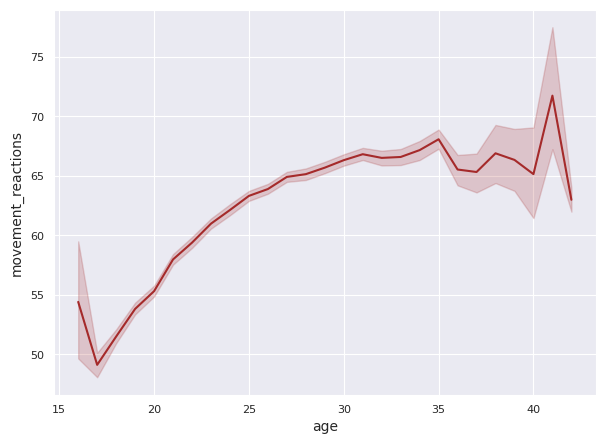

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.lineplot(x='age',y='movement_reactions',data=data,color='brown')
plt.show()

OBSERVATION:
At the age 15 to 20 movement raction is less.
If player age is increasing player movement reaction also increasing.

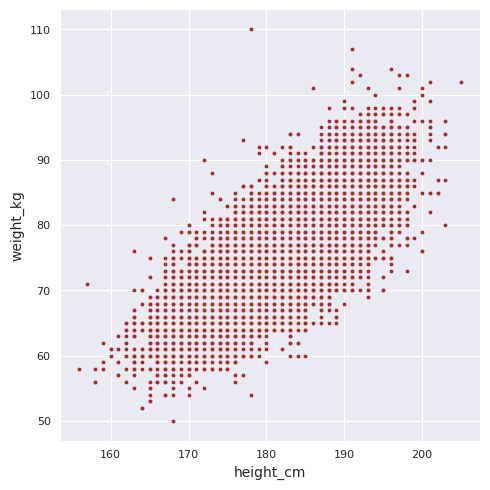

In [ ]:
sns.relplot(x='height_cm',y='weight_kg',data=data,color='brown')
plt.show()

OBSERVATION:
If the players height is increases player weight also increases.

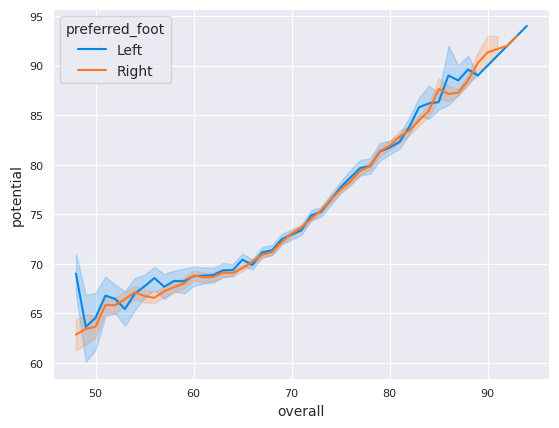

In [ ]:
sns.lineplot(x='overall',y='potential',data=data,color='brown',hue='preferred_foot')
plt.show()

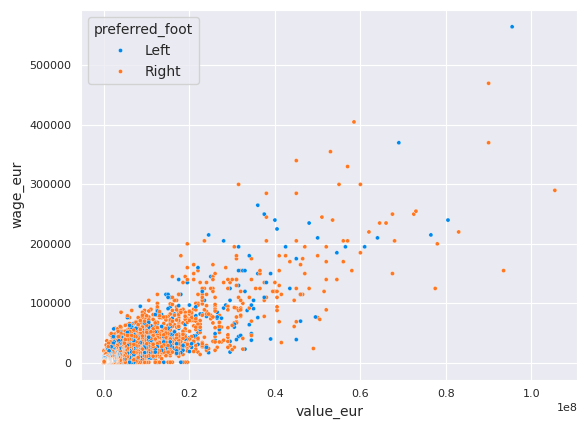

In [ ]:
sns.scatterplot(x='value_eur',y='wage_eur',data=data,color='brown',hue='preferred_foot')
plt.show()

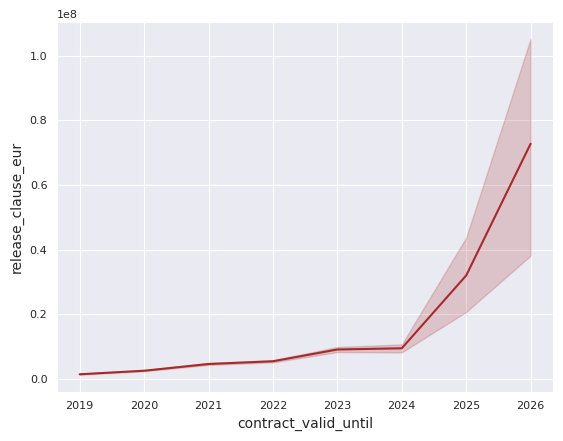

In [ ]:
sns.lineplot(x='contract_valid_until',y='release_clause_eur',data=data,color='brown')
plt.show()

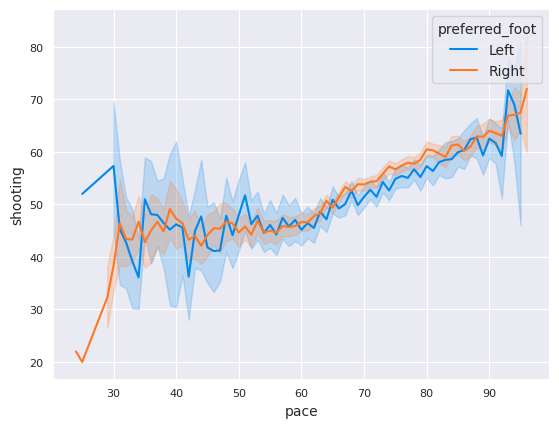

In [ ]:
sns.lineplot(x='pace',y='shooting',data=data,color='brown',hue='preferred_foot')
plt.show()

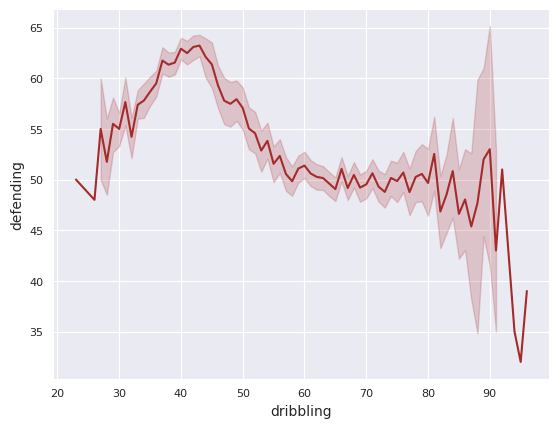

In [ ]:
sns.lineplot(x='dribbling',y='defending',data=data,color='brown')
plt.show()

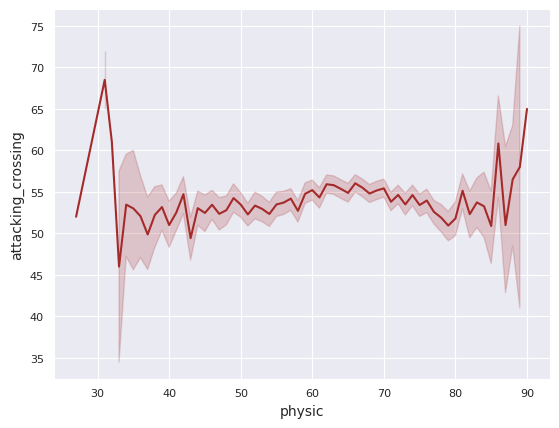

In [ ]:
sns.lineplot(x='physic',y='attacking_crossing',data=data,color='brown')
plt.show()

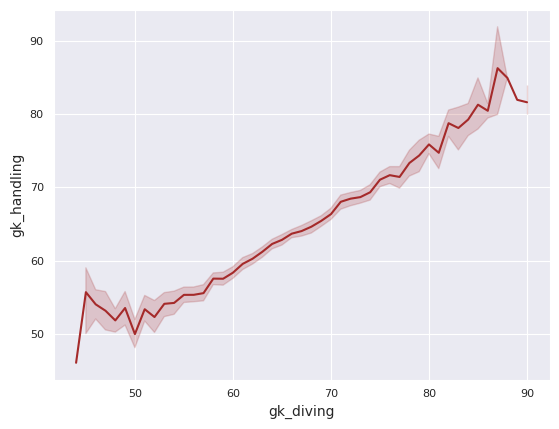

In [ ]:
sns.lineplot(x='gk_diving',y='gk_handling',data=data,color='brown')
plt.show()

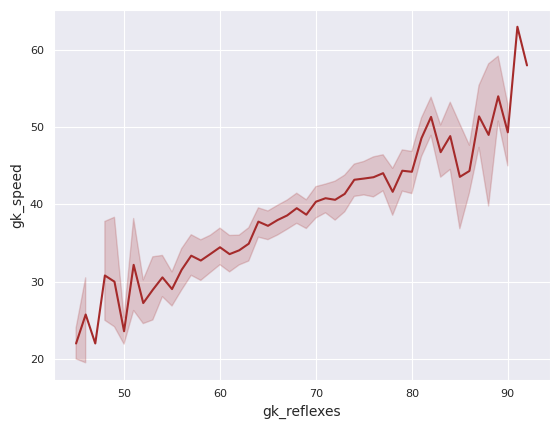

In [ ]:
sns.lineplot(x='gk_reflexes',y='gk_speed',data=data,color='brown')
plt.show()

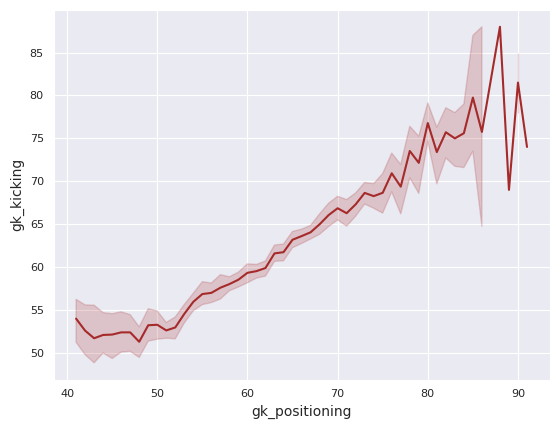

In [ ]:
sns.lineplot(x='gk_positioning',y='gk_kicking',data=data,color='brown')
plt.show()

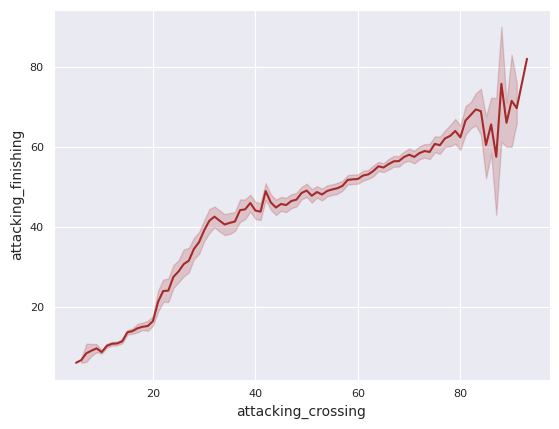

In [ ]:
sns.lineplot(x='attacking_crossing',y='attacking_finishing',data=data,color='brown')
plt.show()

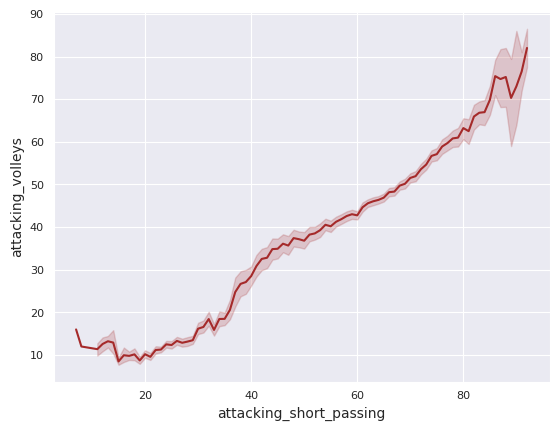

In [ ]:
sns.lineplot(x='attacking_short_passing',y='attacking_volleys',data=data,color='brown')
plt.show()

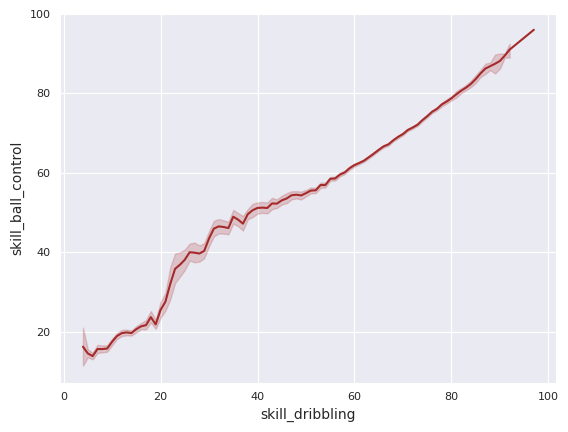

In [ ]:
sns.lineplot(x='skill_dribbling',y='skill_ball_control',data=data,color='brown')
plt.show()

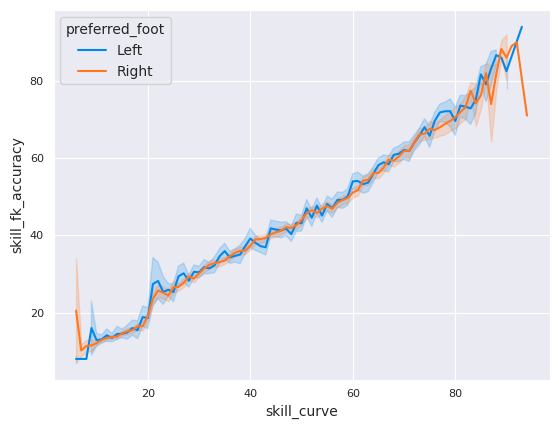

In [ ]:
sns.lineplot(x='skill_curve',y='skill_fk_accuracy',data=data,color='brown',hue='preferred_foot')
plt.show()

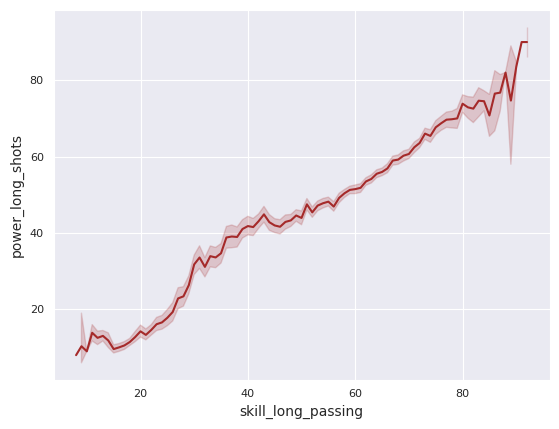

In [ ]:
sns.lineplot(x='skill_long_passing',y='power_long_shots',data=data,color='brown')
plt.show()

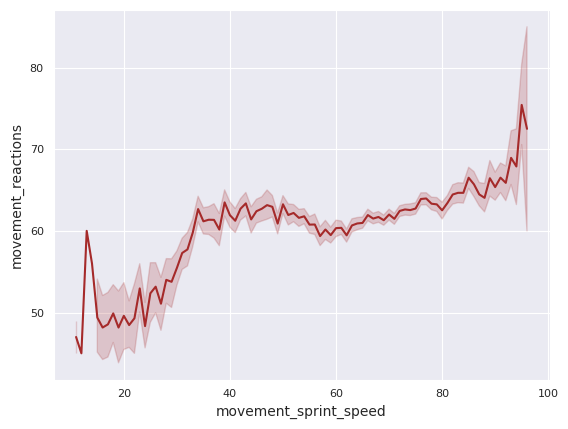

In [ ]:
sns.lineplot(x='movement_sprint_speed',y='movement_reactions',data=data,color='brown')
plt.show()

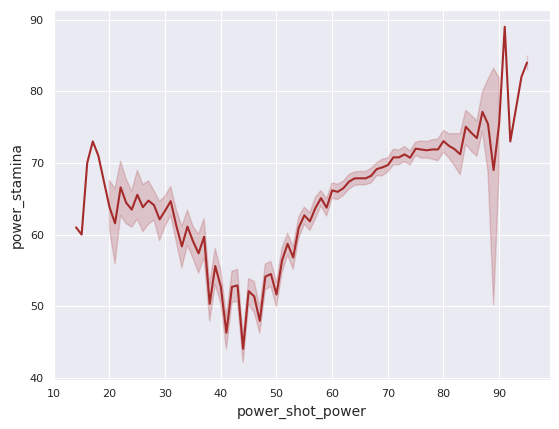

In [ ]:
sns.lineplot(x='power_shot_power',y='power_stamina',data=data,color='brown')
plt.show()

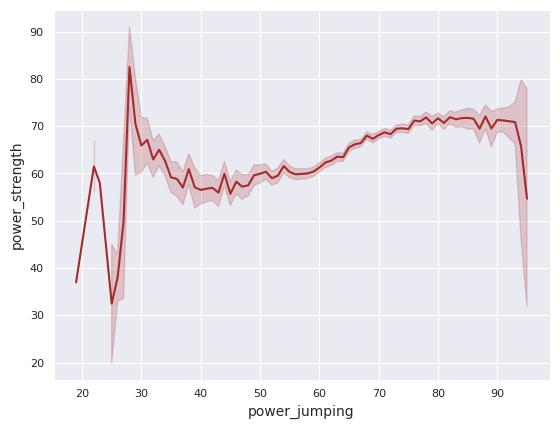

In [ ]:
sns.lineplot(x='power_jumping',y='power_strength',data=data,color='brown')
plt.show()

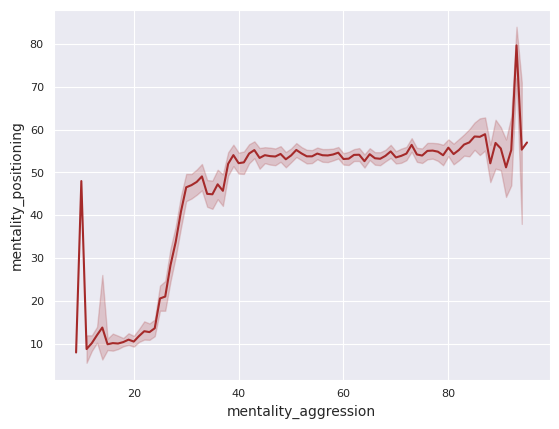

In [ ]:
sns.lineplot(x='mentality_aggression',y='mentality_positioning',data=data,color='brown')
plt.show()

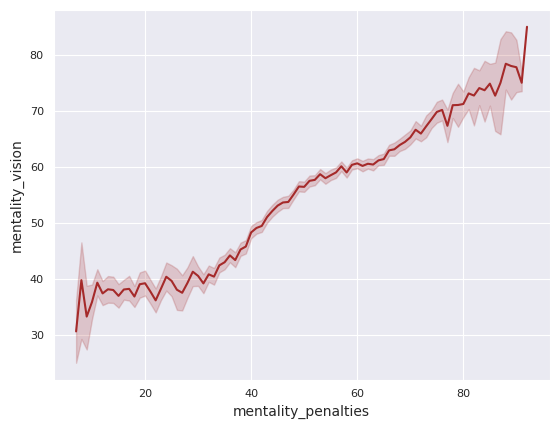

In [ ]:
sns.lineplot(x='mentality_penalties',y='mentality_vision',data=data,color='brown')
plt.show()

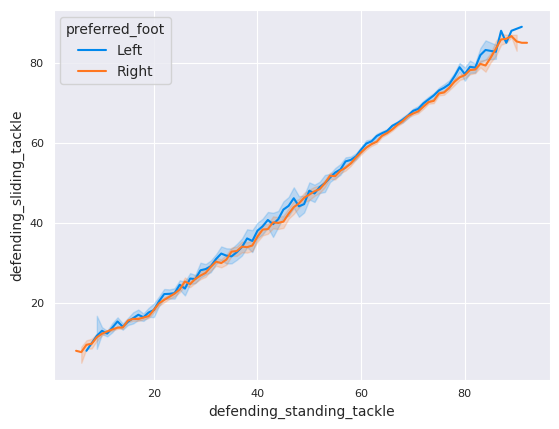

In [ ]:
sns.lineplot(x='defending_standing_tackle',y='defending_sliding_tackle',data=data,color='brown',hue='preferred_foot')
plt.show()